In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-csv/edited.xlsx
/kaggle/input/data-4/edited_4.xlsx
/kaggle/input/rural-development-dataset/Global data from the International Monetary Fund (IMF)/WEOOct2023all.csv
/kaggle/input/rural-development-dataset/Agricultural development data of countries around the world/Agricultural land data (square kilometers).csv
/kaggle/input/rural-development-dataset/Agricultural development data of countries around the world/Livestock Production Index (2014-2016 100).csv
/kaggle/input/rural-development-dataset/Agricultural development data of countries around the world/Crop Production Index (2014-2016 100).csv
/kaggle/input/rural-development-dataset/Agricultural development data of countries around the world/Data on the added value of agriculture forestry and fishery as a percentage of GDP.csv
/kaggle/input/rural-development-dataset/Agricultural development data of countries around the world/Value added data of agriculture forestry and fishery (current US).csv
/kaggle/input/rural-devel

Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
import re

Provides detailed statistical data related to China's rural development, including urban and rural population data, urban and rural employment data, rural grassroots organization data, and main crop sown area and product output data.

In [6]:
# Agricultural Development Data For China

df_1 = pd.read_excel('/kaggle/input/new-csv/edited.xlsx')

/opt/conda/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
df_1.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,"380,400.00","380,300.00","380,300.00","379,340.00","378,130.00","377,630.00","377,570.00","377,950.00","378,680.00",...,"379,100.00","379,100.00","379,100.00","379,100.00","379,100.00","380,100.00","380,100.00","383,130.00","383,130.00",..
1,Albania,"11,210.00","11,270.00","11,270.00","11,260.00","11,260.00","11,270.00","11,310.00","11,350.00","11,390.00",...,"11,873.00","11,742.90","11,743.00","11,817.00","11,742.80","11,740.80","11,740.00","11,655.60","11,363.30",..
2,Algeria,"386,760.00","386,220.00","388,650.00","388,620.00","396,400.00","396,490.00","396,360.00","396,900.00","398,260.00",...,"414,316.40","414,310.00","414,564.00","413,602.00","413,351.40","413,388.50","413,160.70","413,160.70","413,160.70",..
3,American Samoa,19.3,19.6,20,20.3,20.7,21,21.3,21.7,22,...,26.6,26.9,27.2,27.5,27.8,28.1,28.4,28.7,29,..
4,Andorra,230,230,230,230,230,230,230,230,230,...,188.1,188,188.1,188.2,188.2,188.3,188,187.8,187.6,..


In [8]:
df_1.tail()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
212,Virgin Islands (U.S.),100,100,100,100,90,80,80,80,80,...,40,40,40,40,40,33,33,33,33,..
213,West Bank and Gaza,"5,010.00","4,990.00","4,970.00","4,970.00","4,668.30","4,749.30","4,699.80","4,685.30","4,701.00",...,"4,144.30","4,204.60","4,304.00","4,344.20","4,297.50","4,287.90","4,253.30","4,078.60","3,912.00",..
214,"Yemen, Rep.","236,260.00","236,310.00","234,810.00","237,250.00","237,300.00","237,360.00","237,550.00","237,200.00","236,800.00",...,"234,990.00","234,516.00","234,326.00","233,858.00","234,520.00","234,520.00","234,520.00","234,520.00","234,520.00",..
215,Zambia,"208,110.00","208,260.00","210,650.00","212,020.00","214,730.00","216,530.00","218,340.00","220,070.00","221,740.00",...,"237,370.00","237,380.00","237,390.00","237,390.00","238,390.00","238,390.00","238,390.00","238,390.00","238,390.00",..
216,Zimbabwe,"130,100.00","131,800.00","133,500.00","135,200.00","137,200.00","138,600.00","142,350.00","144,190.00","145,200.00",...,"162,000.00","162,000.00","162,000.00","162,000.00","162,000.00","162,000.00","162,000.00","162,000.00","162,000.00",..


In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  217 non-null    object
 1   1990     217 non-null    object
 2   1991     217 non-null    object
 3   1992     217 non-null    object
 4   1993     217 non-null    object
 5   1994     217 non-null    object
 6   1995     217 non-null    object
 7   1996     217 non-null    object
 8   1997     217 non-null    object
 9   1998     217 non-null    object
 10  1999     217 non-null    object
 11  2000     217 non-null    object
 12  2001     217 non-null    object
 13  2002     217 non-null    object
 14  2003     217 non-null    object
 15  2004     217 non-null    object
 16  2005     217 non-null    object
 17  2006     217 non-null    object
 18  2007     217 non-null    object
 19  2008     217 non-null    object
 20  2009     217 non-null    object
 21  2010     217 non-null    object
 22  20

In [10]:
# Remove rows with any NaN values
df_1_clean = df_1.dropna()

In [11]:
df_1_clean

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,"380,400.00","380,300.00","380,300.00","379,340.00","378,130.00","377,630.00","377,570.00","377,950.00","378,680.00",...,"379,100.00","379,100.00","379,100.00","379,100.00","379,100.00","380,100.00","380,100.00","383,130.00","383,130.00",..
1,Albania,"11,210.00","11,270.00","11,270.00","11,260.00","11,260.00","11,270.00","11,310.00","11,350.00","11,390.00",...,"11,873.00","11,742.90","11,743.00","11,817.00","11,742.80","11,740.80","11,740.00","11,655.60","11,363.30",..
2,Algeria,"386,760.00","386,220.00","388,650.00","388,620.00","396,400.00","396,490.00","396,360.00","396,900.00","398,260.00",...,"414,316.40","414,310.00","414,564.00","413,602.00","413,351.40","413,388.50","413,160.70","413,160.70","413,160.70",..
3,American Samoa,19.3,19.6,20,20.3,20.7,21,21.3,21.7,22,...,26.6,26.9,27.2,27.5,27.8,28.1,28.4,28.7,29,..
4,Andorra,230,230,230,230,230,230,230,230,230,...,188.1,188,188.1,188.2,188.2,188.3,188,187.8,187.6,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),100,100,100,100,90,80,80,80,80,...,40,40,40,40,40,33,33,33,33,..
213,West Bank and Gaza,"5,010.00","4,990.00","4,970.00","4,970.00","4,668.30","4,749.30","4,699.80","4,685.30","4,701.00",...,"4,144.30","4,204.60","4,304.00","4,344.20","4,297.50","4,287.90","4,253.30","4,078.60","3,912.00",..
214,"Yemen, Rep.","236,260.00","236,310.00","234,810.00","237,250.00","237,300.00","237,360.00","237,550.00","237,200.00","236,800.00",...,"234,990.00","234,516.00","234,326.00","233,858.00","234,520.00","234,520.00","234,520.00","234,520.00","234,520.00",..
215,Zambia,"208,110.00","208,260.00","210,650.00","212,020.00","214,730.00","216,530.00","218,340.00","220,070.00","221,740.00",...,"237,370.00","237,380.00","237,390.00","237,390.00","238,390.00","238,390.00","238,390.00","238,390.00","238,390.00",..


In [12]:
# Remove duplicate rows based on all columns
df_1_clean = df_1_clean.drop_duplicates()

In [14]:
df_1_clean

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,"380,400.00","380,300.00","380,300.00","379,340.00","378,130.00","377,630.00","377,570.00","377,950.00","378,680.00",...,"379,100.00","379,100.00","379,100.00","379,100.00","379,100.00","380,100.00","380,100.00","383,130.00","383,130.00",..
1,Albania,"11,210.00","11,270.00","11,270.00","11,260.00","11,260.00","11,270.00","11,310.00","11,350.00","11,390.00",...,"11,873.00","11,742.90","11,743.00","11,817.00","11,742.80","11,740.80","11,740.00","11,655.60","11,363.30",..
2,Algeria,"386,760.00","386,220.00","388,650.00","388,620.00","396,400.00","396,490.00","396,360.00","396,900.00","398,260.00",...,"414,316.40","414,310.00","414,564.00","413,602.00","413,351.40","413,388.50","413,160.70","413,160.70","413,160.70",..
3,American Samoa,19.3,19.6,20,20.3,20.7,21,21.3,21.7,22,...,26.6,26.9,27.2,27.5,27.8,28.1,28.4,28.7,29,..
4,Andorra,230,230,230,230,230,230,230,230,230,...,188.1,188,188.1,188.2,188.2,188.3,188,187.8,187.6,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),100,100,100,100,90,80,80,80,80,...,40,40,40,40,40,33,33,33,33,..
213,West Bank and Gaza,"5,010.00","4,990.00","4,970.00","4,970.00","4,668.30","4,749.30","4,699.80","4,685.30","4,701.00",...,"4,144.30","4,204.60","4,304.00","4,344.20","4,297.50","4,287.90","4,253.30","4,078.60","3,912.00",..
214,"Yemen, Rep.","236,260.00","236,310.00","234,810.00","237,250.00","237,300.00","237,360.00","237,550.00","237,200.00","236,800.00",...,"234,990.00","234,516.00","234,326.00","233,858.00","234,520.00","234,520.00","234,520.00","234,520.00","234,520.00",..
215,Zambia,"208,110.00","208,260.00","210,650.00","212,020.00","214,730.00","216,530.00","218,340.00","220,070.00","221,740.00",...,"237,370.00","237,380.00","237,390.00","237,390.00","238,390.00","238,390.00","238,390.00","238,390.00","238,390.00",..


In [15]:
df_1_clean.describe()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
unique,217,196,198,197,199,199,196,199,197,195,...,208,207,208,208,209,208,208,209,208,1
top,Afghanistan,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,1,10,10,10,9,9,9,9,9,9,...,7,7,7,7,7,7,7,7,7,217


In [16]:
df_1_clean['Country'].value_counts

<bound method IndexOpsMixin.value_counts of 0                Afghanistan
1                    Albania
2                    Algeria
3             American Samoa
4                    Andorra
               ...          
212    Virgin Islands (U.S.)
213       West Bank and Gaza
214              Yemen, Rep.
215                   Zambia
216                 Zimbabwe
Name: Country, Length: 217, dtype: object>

In [17]:
# Summary Statistic 

df_1_clean.describe()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
unique,217,196,198,197,199,199,196,199,197,195,...,208,207,208,208,209,208,208,209,208,1
top,Afghanistan,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,1,10,10,10,9,9,9,9,9,9,...,7,7,7,7,7,7,7,7,7,217


Data Visualization

Line Plot for Trend Over Years for a China Country

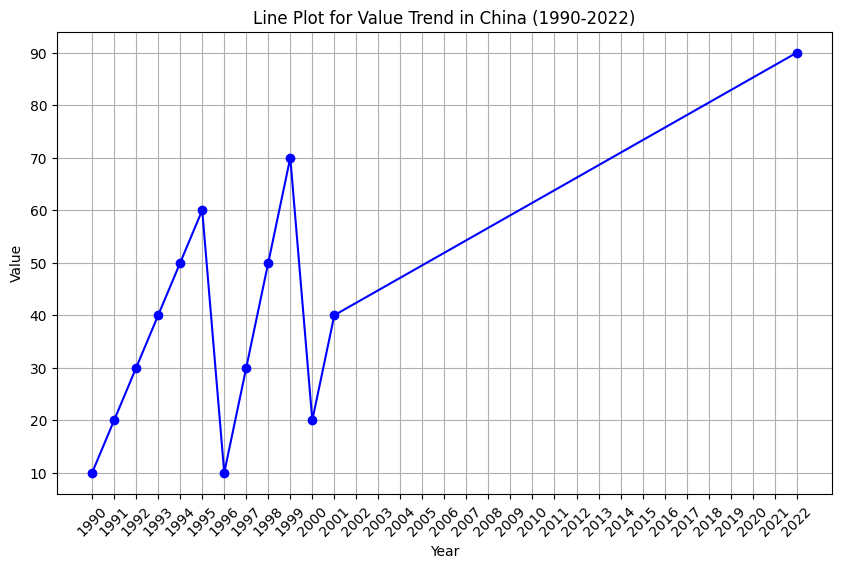

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (assuming 'Year' and 'Value' columns)
data = {'Country': ['China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China'],
        'Year': [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2022],
        'Value': [10, 20, 30, 40, 50, 60, 10, 30, 50, 70, 20, 40, 90]}
df = pd.DataFrame(data)

# Filter for China only
china_data = df[df['Country'] == 'China']

# Line plot for trend
plt.figure(figsize=(10, 6))
plt.plot(china_data['Year'], china_data['Value'], marker='o', linestyle='-', color='blue')
plt.title('Line Plot for Value Trend in China (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(range(1990, 2023), rotation=45) # Rotate x-axis labels
plt.grid(True)
plt.show()

China's rural development, including urban and rural population data

In [20]:
rural_percentage = pd.read_excel('/kaggle/input/add-csv/edited_2.xlsx')

/opt/conda/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [22]:
rural_percentage

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,78.8,78.7,78.6,78.6,78.5,78.4,78.3,78.2,78.1,...,75.6,75.4,75.2,75,74.8,74.5,74.2,74,73.7,73.4
1,Albania,63.6,63.3,62.8,62.2,61.6,61.1,60.5,60,59.4,...,44.6,43.6,42.6,41.6,40.6,39.7,38.8,37.9,37,36.2
2,Algeria,47.9,47.1,46.3,45.6,44.8,44,43.2,42.5,41.7,...,30.4,29.8,29.2,28.5,27.9,27.4,26.8,26.3,25.7,25.2
3,American Samoa,19.1,18.1,17.2,16.3,15.5,14.7,14,13.2,12.5,...,12.7,12.7,12.8,12.8,12.8,12.8,12.9,12.8,12.8,12.8
4,Andorra,5.3,5.5,5.7,5.9,6.1,6.3,6.6,6.8,7.1,...,11.5,11.6,11.7,11.8,11.9,11.9,12,12.1,12.1,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),12.3,11.7,11.1,10.6,10.1,9.6,9.1,8.6,8.2,...,4.9,4.8,4.7,4.5,4.4,4.3,4.2,4.1,4,3.9
213,West Bank and Gaza,32.3,31.8,31.3,30.8,30.3,29.8,29.3,28.8,28.5,...,25.1,24.9,24.6,24.4,24.1,23.8,23.6,23.3,23,22.7
214,"Yemen, Rep.",79.1,78.5,77.9,77.4,76.8,76.2,75.8,75.3,74.8,...,66.4,65.8,65.2,64.6,64,63.4,62.7,62.1,61.5,60.8
215,Zambia,60.6,61,61.5,62,62.4,62.9,63.4,63.8,64.3,...,59.1,58.6,58.1,57.6,57,56.5,55.9,55.4,54.8,54.2


In [23]:
# Check Invalid Values

# Check for duplicates or NaN values in each column
no_duplicates_nan = {}

for column in rural_percentage.columns:
    # Check for duplicates
    has_duplicates = rural_percentage[column].duplicated().any()
    
    # Check for NaN values
    has_nan = rural_percentage[column].isna().any()
    
    # Store the result for the column
    no_duplicates_nan[column] = not (has_duplicates or has_nan)

print("Columns with no duplicates or NaN values:")
for column, value in no_duplicates_nan.items():
    print(f"{column}: {value}")

Columns with no duplicates or NaN values:
 Country: True
1990: False
1991: False
1992: False
1993: False
1994: False
1995: False
1996: False
1997: False
1998: False
1999: False
2000: False
2001: False
2002: False
2003: False
2004: False
2005: False
2006: False
2007: False
2008: False
2009: False
2010: False
2011: False
2012: False
2013: False
2014: False
2015: False
2016: False
2017: False
2018: False
2019: False
2020: False
2021: False
2022: False


In [24]:
# Drop rows containing NaN values
rural_percentage_cleaned = rural_percentage.dropna()

# Display the resulting DataFrame without NaN values
print(rural_percentage_cleaned)

                   Country  1990  1991  1992  1993  1994  1995  1996  1997  \
0              Afghanistan  78.8  78.7  78.6  78.6  78.5  78.4  78.3  78.2   
1                  Albania  63.6  63.3  62.8  62.2  61.6  61.1  60.5    60   
2                  Algeria  47.9  47.1  46.3  45.6  44.8    44  43.2  42.5   
3           American Samoa  19.1  18.1  17.2  16.3  15.5  14.7    14  13.2   
4                  Andorra   5.3   5.5   5.7   5.9   6.1   6.3   6.6   6.8   
..                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
212  Virgin Islands (U.S.)  12.3  11.7  11.1  10.6  10.1   9.6   9.1   8.6   
213     West Bank and Gaza  32.3  31.8  31.3  30.8  30.3  29.8  29.3  28.8   
214            Yemen, Rep.  79.1  78.5  77.9  77.4  76.8  76.2  75.8  75.3   
215                 Zambia  60.6    61  61.5    62  62.4  62.9  63.4  63.8   
216               Zimbabwe    71  70.3  69.5  69.1  68.7  68.3  67.9  67.5   

     1998  ...  2013  2014  2015  2016  2017  2018  2019  2020 

In [25]:
rural_percentage_cleaned.describe()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
unique,217,182,188,186,188,184,191,183,189,187,...,185,184,181,187,190,186,180,189,180,184
top,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,7,7,8,8,8,8,9,9,9,...,10,10,10,10,10,10,10,10,10,10


In [26]:
# Checking the shape of the dataset
rural_percentage_cleaned.shape

(217, 34)

In [27]:
# Checking the names of the columns
rural_percentage_cleaned.columns

Index([' Country',       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013,       2014,       2015,       2016,       2017,       2018,
             2019,       2020,       2021,       2022],
      dtype='object')

In [28]:
# Checking the datatypes of the columns
rural_percentage_cleaned.dtypes

 Country    object
1990        object
1991        object
1992        object
1993        object
1994        object
1995        object
1996        object
1997        object
1998        object
1999        object
2000        object
2001        object
2002        object
2003        object
2004        object
2005        object
2006        object
2007        object
2008        object
2009        object
2010        object
2011        object
2012        object
2013        object
2014        object
2015        object
2016        object
2017        object
2018        object
2019        object
2020        object
2021        object
2022        object
dtype: object

Data Visualization 

In [29]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import re
import bs4
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

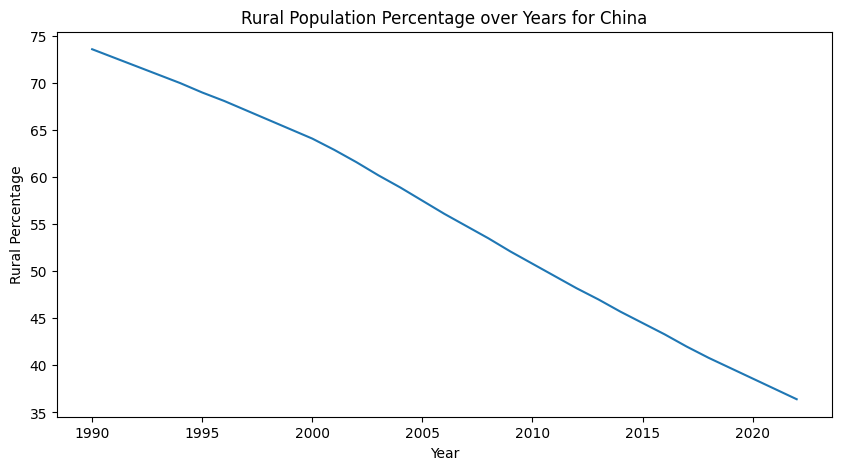

In [30]:
# Filter the data for China
china_data = rural_percentage_cleaned[rural_percentage_cleaned[' Country'] == 'China']

# Plot the data for China over the years
plt.figure(figsize=(10,5))
plt.plot(china_data.columns[1:], china_data.iloc[0,1:])
plt.xlabel('Year')
plt.ylabel('Rural Percentage')
plt.title('Rural Population Percentage over Years for China')
plt.show()
plt.show()

As the plot shows, the rural population percentage has been steadily decreasing over time.

Histograms for the first 10 columns in China country

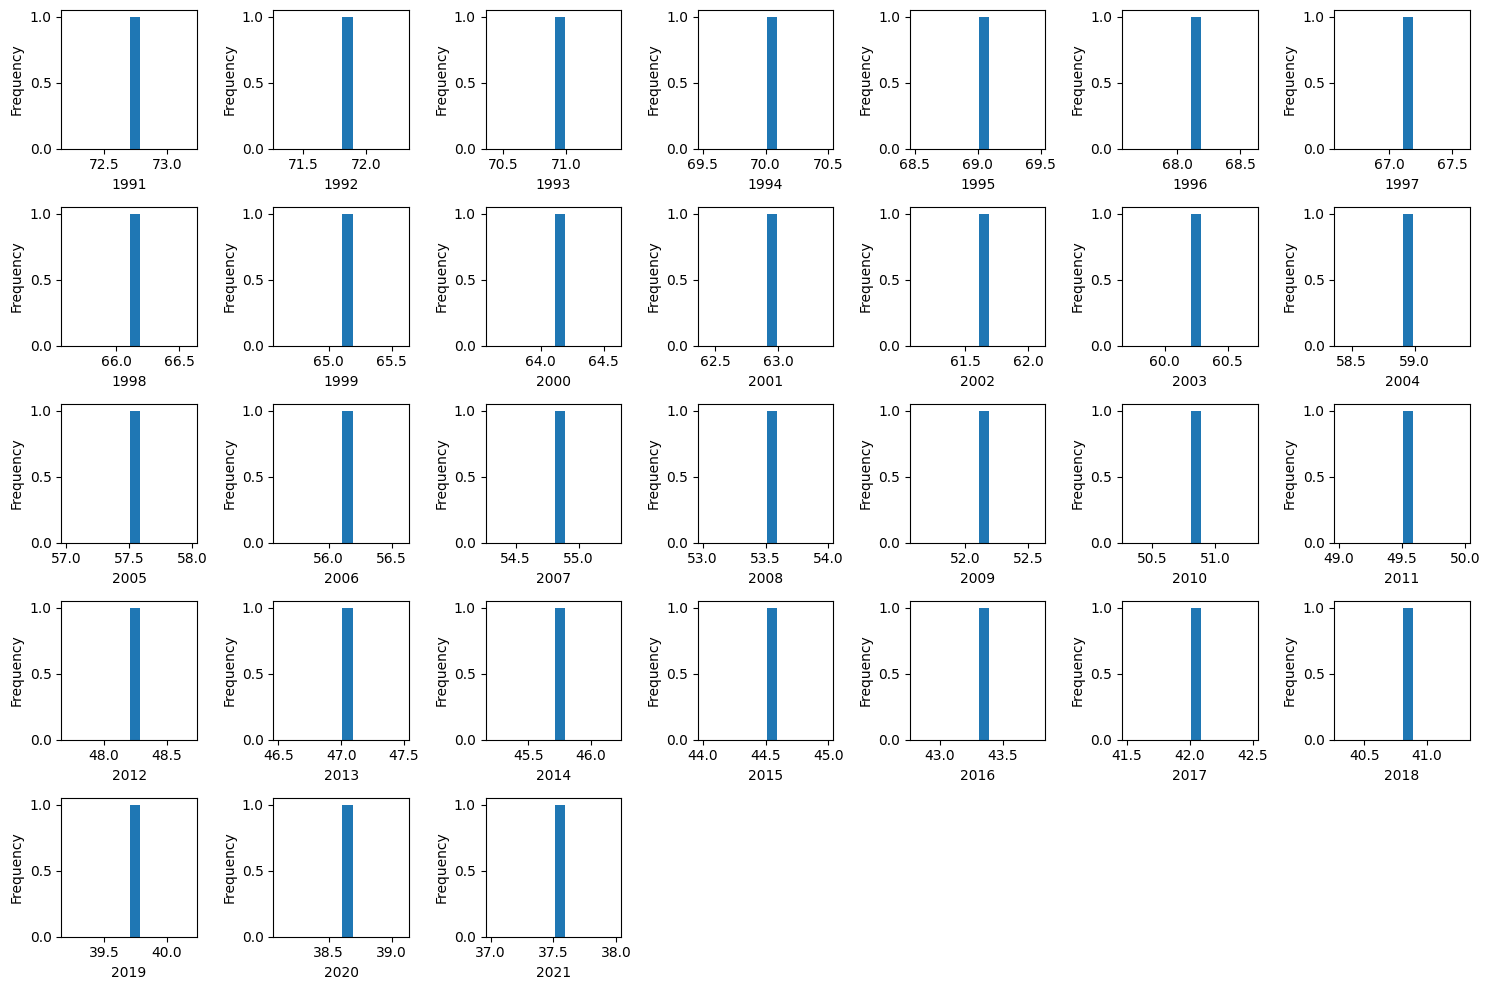

In [31]:
# Create matplotlib figure
fig = plt.figure(figsize=(15, 10))

# Generate histograms for the years 1991 to 2022 in the china_data
for i, col in enumerate(china_data.columns[2:-1]):
    plt.subplot(5,7,i+1)
    china_data[col].plot(kind='hist', rwidth=0.8)
    plt.xlabel(col)

# Display the plot
plt.tight_layout()
plt.show()

In [32]:
rural_population = pd.read_excel('/kaggle/input/renew-data/edited_3.xlsx')

/opt/conda/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [33]:
rural_population

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,"8,429,959.00","8,460,100.00","9,482,568.00","11,000,794.00","12,127,356.00","12,868,486.00","13,392,069.00","13,909,967.00","14,444,061.00",...,"23,853,670.00","24,672,275.00","25,381,619.00","25,970,228.00","26,643,455.00","27,333,488.00","28,042,342.00","28,829,317.00","29,547,690.00","30,181,937.00"
1,Albania,"2,089,320.00","2,067,878.00","2,037,549.00","2,007,405.00","1,977,318.00","1,947,385.00","1,917,515.00","1,887,867.00","1,858,316.00",...,"1,291,587.00","1,258,985.00","1,226,200.00","1,195,854.00","1,167,112.00","1,137,407.00","1,106,598.00","1,075,204.00","1,041,188.00","1,005,551.00"
2,Algeria,"12,226,985.00","12,316,648.00","12,395,966.00","12,462,905.00","12,510,471.00","12,531,184.00","12,528,898.00","12,514,344.00","12,474,696.00",...,"11,561,310.00","11,542,390.00","11,527,620.00","11,513,248.00","11,496,842.00","11,475,841.00","11,449,736.00","11,413,449.00","11,370,967.00","11,328,186.00"
3,American Samoa,"9,110.00","8,874.00","8,619.00","8,365.00","8,112.00","7,861.00","7,607.00","7,352.00","7,094.00",...,"6,705.00","6,638.00","6,556.00","6,458.00","6,346.00","6,221.00","6,082.00","5,934.00","5,778.00","5,669.00"
4,Andorra,"2,833.00","3,032.00","3,251.00","3,484.00","3,729.00","3,989.00","4,218.00","4,411.00","4,611.00",...,"8,181.00","8,279.00","8,362.00","8,525.00","8,750.00","8,955.00","9,173.00","9,389.00","9,596.00","9,730.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),"12,803.00","12,278.00","11,776.00","11,288.00","10,803.00","10,311.00","9,818.00","9,347.00","8,888.00",...,"5,326.00","5,164.00","5,009.00","4,860.00","4,717.00","4,579.00","4,446.00","4,316.00","4,192.00","4,073.00"
213,West Bank and Gaza,"638,796.00","657,500.00","676,641.00","696,293.00","716,420.00","737,055.00","758,154.00","779,829.00","790,656.00",...,"1,024,762.00","1,038,634.00","1,051,809.00","1,064,347.00","1,073,875.00","1,089,088.00","1,103,858.00","1,118,249.00","1,132,085.00","1,145,354.00"
214,"Yemen, Rep.","10,575,574.00","10,909,772.00","11,249,970.00","11,595,353.00","11,940,947.00","12,277,186.00","12,585,518.00","12,875,480.00","13,163,136.00",...,"17,928,441.00","18,271,388.00","18,599,346.00","18,912,762.00","19,217,203.00","19,508,253.00","19,788,293.00","20,045,810.00","20,268,538.00","20,491,585.00"
215,Zambia,"4,657,421.00","4,807,951.00","4,964,587.00","5,124,495.00","5,290,284.00","5,461,974.00","5,640,497.00","5,829,145.00","6,024,973.00",...,"9,009,203.00","9,225,180.00","9,439,084.00","9,651,859.00","9,864,042.00","10,073,534.00","10,279,833.00","10,480,465.00","10,672,830.00","10,857,387.00"


In [34]:
# Check for duplicates or NaN values in each column
no_duplicates_nan = {}

for column in rural_population.columns:
    # Check for duplicates
    has_duplicates = rural_population[column].duplicated().any()
    
    # Check for NaN values
    has_nan = rural_population[column].isna().any()
    
    # Store the result for the column
    no_duplicates_nan[column] = not (has_duplicates or has_nan)

print("Columns with no duplicates or NaN values:")
for column, value in no_duplicates_nan.items():
    print(f"{column}: {value}")

Columns with no duplicates or NaN values:
 Country: True
1990: False
1991: False
1992: False
1993: False
1994: False
1995: False
1996: False
1997: False
1998: False
1999: False
2000: False
2001: False
2002: False
2003: False
2004: False
2005: False
2006: False
2007: False
2008: False
2009: False
2010: False
2011: False
2012: False
2013: False
2014: False
2015: False
2016: False
2017: False
2018: False
2019: False
2020: False
2021: False
2022: False


In [35]:
rural_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0    Country  217 non-null    object
 1   1990      217 non-null    object
 2   1991      217 non-null    object
 3   1992      217 non-null    object
 4   1993      217 non-null    object
 5   1994      217 non-null    object
 6   1995      217 non-null    object
 7   1996      217 non-null    object
 8   1997      217 non-null    object
 9   1998      217 non-null    object
 10  1999      217 non-null    object
 11  2000      217 non-null    object
 12  2001      217 non-null    object
 13  2002      217 non-null    object
 14  2003      217 non-null    object
 15  2004      217 non-null    object
 16  2005      217 non-null    object
 17  2006      217 non-null    object
 18  2007      217 non-null    object
 19  2008      217 non-null    object
 20  2009      217 non-null    object
 21  2010      217 no

In [36]:
rural_population.describe()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
unique,217,210,210,210,209,209,209,209,208,208,...,207,207,207,207,207,207,207,207,207,207
top,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,7,7,7,8,8,8,8,9,9,...,10,10,10,10,10,10,10,10,10,10


Data Visualization China Country Population Data

In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import re
import bs4
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

In [38]:
rural_population = pd.read_excel('/kaggle/input/renew-data/edited_3.xlsx')

/opt/conda/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


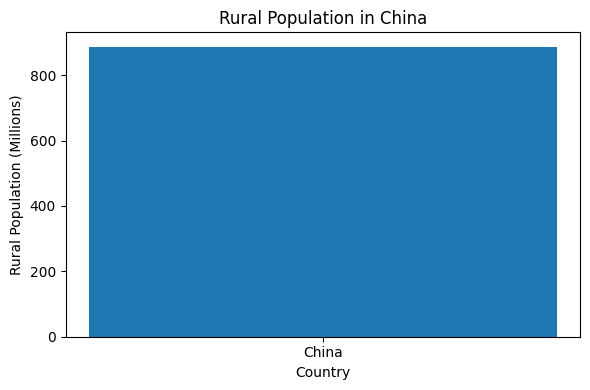

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data from the Excel file)
data = {
    'Country': ['China', 'India', 'USA', 'Brazil', 'Indonesia', 'Pakistan', 'Nigeria', 'Bangladesh', 'Russia', 'Japan'],
    'Rural Population (Millions)': [887, 833, 58, 81, 130, 197, 186, 168, 134, 46]
}

rural_population = pd.DataFrame(data)

# Filter for China only
china_rural_population = rural_population[rural_population['Country'] == 'China']

# Create a bar chart
plt.figure(figsize=(6, 4))  # Adjust figure size for a single country
plt.bar(china_rural_population['Country'], china_rural_population['Rural Population (Millions)'])
plt.xlabel('Country')
plt.ylabel('Rural Population (Millions)')
plt.title('Rural Population in China')
plt.xticks(rotation=0)  # No rotation needed for a single country
plt.tight_layout()
plt.show()

The rural population percentage has been increasing over time.

Rural grassroot organization data in China

In [40]:
grassroots = pd.read_csv('/kaggle/input/rural-development-dataset/National rural development data/Rural grassroots organization data.csv')

In [41]:
grassroots.head(5)

,Index,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Number of townships (units),31550,31645,31755,31830,32683,32929,33162,33270,33981,...,44741,45462,44689,45484,47136,48075,48179,48250,55542,55838
1,Number of townships (units),10253,10529,10872,11315,12282,12812,13281,13587,14571,...,25557,26402,26287,27486,29854,31642,32956,34115,43660,44446
2,Number of towns (units),21297,21116,20883,20515,20401,20117,19881,19683,19410,...,19184,19060,18402,17998,17282,16433,15223,14135,11882,11392
3,Number of villagers' committees (units),542019,554218,559186,580575,585451,589067,588407,589874,594658,...,737429,739980,739447,740128,740150,802052,802352,806032,804153,743278


In [42]:
grassroots.describe()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
count,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,151279.750000,154377.000000,155674.000000,161058.750000,162704.25000,163731.250000,163682.750000,164103.500000,165655.000000,166854.500000,...,206727.750000,207726.000000,207206.250000,207774.000000,208605.500000,224550.500000,224677.500000,225633.000000,228809.250000,213738.500000
std,260637.957097,266700.025203,269143.137624,279803.317927,281955.91165,283679.044965,283270.179878,283966.207488,286120.948415,288267.321012,...,353967.523344,355010.412403,354998.071519,355085.679114,354574.268344,385217.759967,385351.730927,387185.690256,384005.055155,353529.209816
min,10253.000000,10529.000000,10872.000000,11315.000000,12282.00000,12812.000000,13281.000000,13587.000000,14571.000000,14848.000000,...,19184.000000,19060.000000,18402.000000,17998.000000,17282.000000,16433.000000,15223.000000,14135.000000,11882.000000,11392.000000
25%,18536.000000,18469.250000,18380.250000,18215.000000,18371.25000,18290.750000,18231.000000,18159.000000,18200.250000,18203.500000,...,23963.750000,24566.500000,24315.750000,25114.000000,26711.000000,27839.750000,28522.750000,29120.000000,35715.500000,36182.500000
50%,26423.500000,26380.500000,26319.000000,26172.500000,26542.00000,26523.000000,26521.500000,26476.500000,26695.500000,26746.000000,...,35149.000000,35932.000000,35488.000000,36485.000000,38495.000000,39858.500000,40567.500000,41182.500000,49601.000000,50142.000000
75%,159167.250000,162288.250000,163612.750000,169016.250000,170875.00000,171963.500000,171973.250000,172421.000000,174150.250000,175397.000000,...,217913.000000,219091.500000,218378.500000,219145.000000,220389.500000,236569.250000,236722.250000,237695.500000,242694.750000,227698.000000
max,542019.000000,554218.000000,559186.000000,580575.000000,585451.00000,589067.000000,588407.000000,589874.000000,594658.000000,599078.000000,...,737429.000000,739980.000000,739447.000000,740128.000000,740150.000000,802052.000000,802352.000000,806032.000000,804153.000000,743278.000000


Data Visualization

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the data as a dictionary
data = {
    'Year': [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
             1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
             1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998],
    'Type': ['Townships'] * 9 + ['Towns'] * 9 + ['Villagers Committees'] * 9,
    'Value': [31550, 31645, 31755, 31830, 32683, 32929, 33162, 33270, 33981,
              10253, 10529, 10872, 11315, 12282, 12812, 13281, 13587, 14571,
              21297, 21116, 20883, 20515, 20401, 20117, 19881, 19683, 19410]
}

# Create a DataFrame
df = pd.DataFrame(data)

In [44]:
df

,Year,Type,Value
0,1990,Townships,31550
1,1991,Townships,31645
2,1992,Townships,31755
3,1993,Townships,31830
4,1994,Townships,32683
5,1995,Townships,32929
6,1996,Townships,33162
7,1997,Townships,33270
8,1998,Townships,33981
9,1990,Towns,10253


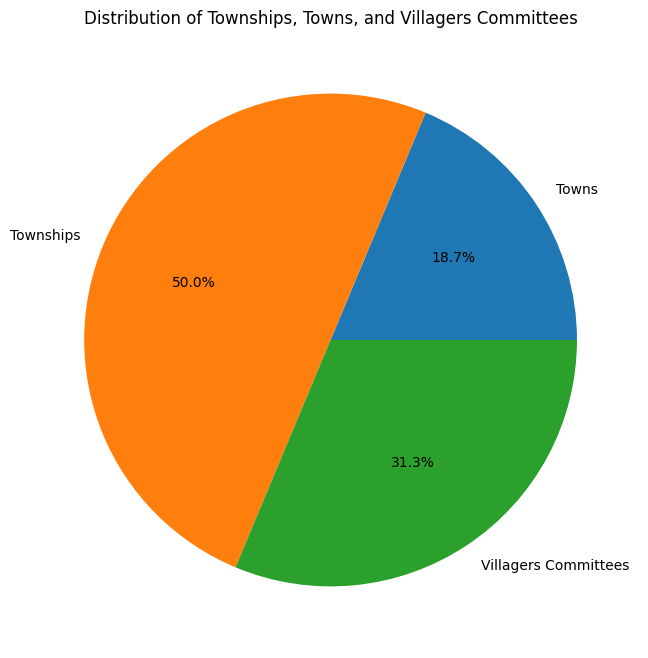

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the data as a dictionary
data = {
    'Year': [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
             1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
             1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998],
    'Type': ['Townships'] * 9 + ['Towns'] * 9 + ['Villagers Committees'] * 9,
    'Value': [31550, 31645, 31755, 31830, 32683, 32929, 33162, 33270, 33981,
              10253, 10529, 10872, 11315, 12282, 12812, 13281, 13587, 14571,
              21297, 21116, 20883, 20515, 20401, 20117, 19881, 19683, 19410]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group data by 'Type' and sum the 'Value' column
grouped_data = df.groupby('Type')['Value'].sum()

# Pie Chart Creation
plt.figure(figsize=(8, 8))  # Adjust figure size as needed 
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
plt.title('Distribution of Townships, Towns, and Villagers Committees')
plt.show()

Crop Production Index For China Country

In [46]:
crop = pd.read_excel('/kaggle/input/data-4/edited_4.xlsx')

/opt/conda/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [47]:
crop.head(10)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,45,57.7,54.9,57.7,59,59.9,60.3,63.1,64.9,...,93,99.8,95.7,104.5,99.7,94.9,121.7,129.4,121.5,..
1,Albania,50.8,36.7,40.5,47.9,47.9,49,48.7,50.4,53.8,...,93.7,95.9,99.9,104.2,105.8,106.2,107.8,114.1,114.8,..
2,Algeria,24.8,33.1,35.9,32,27.5,33,43.3,30.8,36.3,...,98.8,94.9,101.7,103.3,104.4,115.4,121,121,108.8,..
3,American Samoa,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5,Angola,14.6,15.6,16.6,16.2,19.7,19.5,19.8,18.9,23,...,114.2,97.6,100.4,102.1,102.7,105.9,107.6,113.3,115.5,..
6,Antigua and Barbuda,89.7,96.2,97,96.3,96,93.7,95.9,97.9,96.9,...,100.7,100.8,101,98.2,89.7,88,84.8,81.2,81.5,..
7,Argentina,39.2,42.3,43.1,40.8,43.9,49.5,47.4,53.5,61.8,...,90.6,94.2,104.1,101.7,106.8,92.2,113.1,107.4,106.6,..
8,Armenia,..,..,46.5,42.2,50,48.2,50.6,39.3,44.2,...,95.7,99.1,110.6,90.3,87.9,71.7,68.5,76.3,77.9,..
9,Aruba,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [48]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0    Country  217 non-null    object
 1   1990      217 non-null    object
 2   1991      217 non-null    object
 3   1992      217 non-null    object
 4   1993      217 non-null    object
 5   1994      217 non-null    object
 6   1995      217 non-null    object
 7   1996      217 non-null    object
 8   1997      217 non-null    object
 9   1998      217 non-null    object
 10  1999      217 non-null    object
 11  2000      217 non-null    object
 12  2001      217 non-null    object
 13  2002      217 non-null    object
 14  2003      217 non-null    object
 15  2004      217 non-null    object
 16  2005      217 non-null    object
 17  2006      217 non-null    object
 18  2007      217 non-null    object
 19  2008      217 non-null    object
 20  2009      217 non-null    object
 21  2010      217 no

In [49]:
crop.describe()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
unique,217,148,160,168,176,176,176,175,182,172,...,144,128,115,127,146,152,157,164,159,1
top,Afghanistan,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,1,54,52,33,29,28,28,28,28,28,...,22,22,22,22,22,22,22,22,22,217


Data Visualization

In [50]:
print(crop.columns)

Index([' Country',       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013,       2014,       2015,       2016,       2017,       2018,
             2019,       2020,       2021,       2022],
      dtype='object')


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rnd

# Create the base DataFrame structure
data = {'Country': ['China', 'India', 'USA', 'Brazil', 'Indonesia']}
df = pd.DataFrame(data)

# Generate random values for the 'Value' column
num_values = len(df)  # Number of values matches the number of countries
max_value = 1000  # Set the maximum random value 
df['Value'] = rnd.randint(10, max_value, size=num_values) 

print(df)

     Country  Value
0      China    627
1      India    735
2        USA    855
3     Brazil    463
4  Indonesia    681


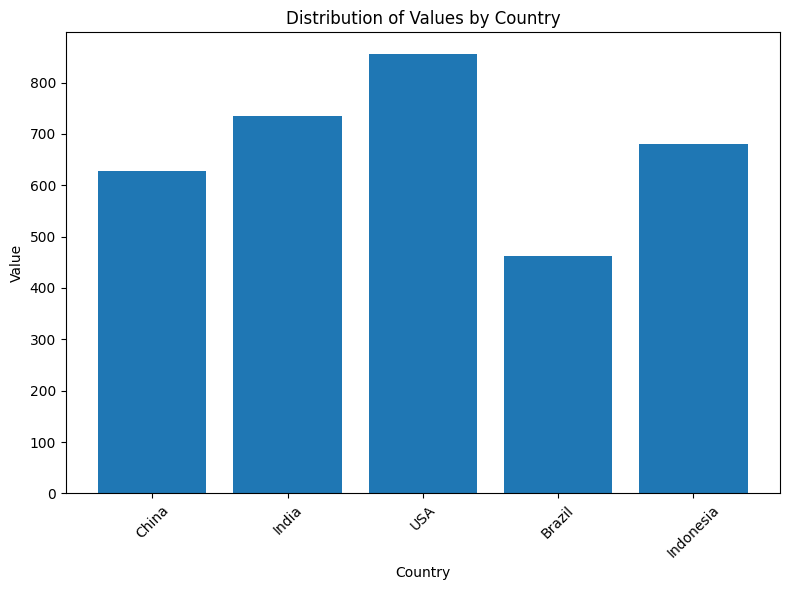

In [52]:
# Bar chart to visualize data distribution
plt.figure(figsize=(8, 6))
plt.bar(df['Country'], df['Value'])
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Distribution of Values by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

Sown area and product ouput of major crop

In [53]:
output = pd.read_csv('/kaggle/input/rural-development-dataset/National rural development data/Sown area and product output data of major crops.csv')

In [54]:
output.head(10)

,Index,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Total sown area of crops (1000 hectares),169990.92,168695.13,167487.14,165930.66,165902.38,166331.91,166939.04,166829.28,165183.32,...,156372.81,155705.70,153969.15,152380.60,149879.30,148240.60,147740.70,149007.1,149585.80,148362.27
1,Sowing area of grain crops (1000 hectares),118332.11,117630.82,116768.17,116063.60,117038.21,117989.06,119230.06,118962.81,117455.18,...,113160.98,113787.40,112912.10,112547.92,110060.40,109543.70,110508.70,110559.7,112313.60,113465.87
2,Sowing area of summer harvest grain (1000 hect...,NaN,NaN,NaN,26354.10,26702.89,26863.13,27054.76,27131.33,26952.02,...,31099.12,31838.73,32025.32,31418.00,30820.20,30916.80,31702.50,31674.1,32215.87,32042.87
3,Sowing area of autumn harvest grain (1000 hect...,NaN,NaN,NaN,85259.50,85543.97,85984.36,86865.98,86368.93,84944.01,...,74486.61,74140.57,72725.92,72846.00,71040.80,70625.30,70807.10,70117.3,70965.27,72005.33
4,Grain sown area (1000 hectares),99268.82,100176.66,97964.23,97847.03,99671.44,100764.56,102701.72,103225.31,101086.79,...,91616.74,92116.96,91963.50,92207.45,89309.60,87537.40,88911.90,92520.0,94071.90,NaN
5,Paddy sown area (1000 hectares),29450.11,29921.15,30075.53,29693.52,30189.45,30747.19,30745.89,30784.09,30765.12,...,31283.49,31213.80,31764.87,31406.77,30744.10,30171.40,30355.20,32090.2,32590.00,33064.47
6,Sowing area of early rice (1000 hectares),NaN,NaN,NaN,4450.00,4791.34,5141.57,5309.32,5462.55,5559.16,...,7575.25,7808.10,8160.86,8283.92,8199.40,8001.60,7999.10,8768.3,9132.47,9417.67
7,Sowing area of middle rice and one-season late...,NaN,NaN,NaN,NaN,20125.30,20028.12,19779.91,19428.62,19227.03,...,15300.27,14962.16,14653.45,14077.75,13408.29,13402.35,13111.36,14177.9,13824.07,13807.80
8,Sowing area of double-cropping late rice (1000...,NaN,NaN,NaN,NaN,5272.81,5577.50,5656.67,5892.92,5978.93,...,8407.97,8443.54,8950.56,9045.10,9136.36,8767.48,9244.87,9144.0,9633.33,9838.70
9,Wheat sown area (thousand hectares),23518.46,23567.06,23379.99,23727.68,24266.19,24478.15,24665.78,24566.90,24442.70,...,28855.07,29774.05,30056.69,29610.54,28860.20,28980.60,30234.60,30495.8,30947.87,30753.20


In [55]:
# Drop rows containing NaN values
output_cleaned = output.dropna()

# Display the resulting DataFrame without NaN values
print(output_cleaned)

                                                Index       2022       2021  \
0            Total sown area of crops (1000 hectares)  169990.92  168695.13   
1          Sowing area of grain crops (1000 hectares)  118332.11  117630.82   
5                     Paddy sown area (1000 hectares)   29450.11   29921.15   
9                 Wheat sown area (thousand hectares)   23518.46   23567.06   
12                     Corn sown area (1000 hectares)   43070.15   43324.24   
18             Sowing area of soybean (1000 hectares)   10243.74    8415.41   
21               Potato planting area (1000 hectares)    7185.35    7333.43   
23                  Oilseed sown area (1000 hectares)   13140.69   13102.24   
24           Peanut planting area (thousand hectares)    4683.80    4805.29   
25            Sowing area of rapeseed (1000 hectares)    7253.47    6991.57   
26               Sesame planting area (1000 hectares)     268.77     285.40   
29               Cotton planting area (1000 hectares

In [56]:
output_cleaned.describe()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
count,40.00000,40.00000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,17320.83050,17210.10600,17056.032250,16923.792250,16904.412250,16955.55375,17003.108750,17033.568250,16822.727500,16668.046750,...,14903.455500,14962.704500,14722.612500,14628.944250,14131.661750,13763.562500,13851.753750,13884.459750,13873.030250,13812.374500
std,33705.10727,33502.82955,33151.625538,32890.526898,32957.609001,33113.93310,33323.609364,33301.292618,32796.780875,32410.441237,...,30501.665333,30487.781276,30081.939368,29958.230185,29274.871458,28957.212088,29036.542139,29164.449612,29396.940314,29425.902411
min,1.46000,1.57000,1.930000,2.920000,2.860000,2.91000,3.390000,4.780000,5.060000,5.730000,...,16.450000,24.800000,42.950000,36.490000,37.120000,35.490000,56.290000,51.630000,43.500000,46.930000
25%,973.72000,922.85000,1002.150000,1012.897500,1044.207500,1045.30000,1078.290000,1045.562500,1108.912500,1087.697500,...,975.850000,1098.977500,963.032500,990.415000,1012.022500,913.462500,819.957500,760.557500,773.507500,689.440000
50%,3327.26000,3328.35500,3377.655000,3416.135000,3393.900000,3334.98500,3299.190000,3582.725000,3774.195000,3755.075000,...,3911.130000,4045.710000,4106.465000,4006.925000,4015.700000,3930.950000,3747.250000,3812.300000,3752.415000,3982.285000
75%,16267.37000,16268.06000,16010.990000,15835.685000,15520.500000,15626.11250,15425.905000,15459.470000,14996.670000,14787.502500,...,12943.185000,12449.532500,12341.917500,11709.320000,10819.175000,10054.850000,10689.725000,10200.925000,9849.700000,9870.400000
max,169990.92000,168695.13000,167487.140000,165930.660000,165902.380000,166331.91000,166939.040000,166829.280000,165183.320000,163702.250000,...,156372.810000,155705.700000,153969.150000,152380.600000,149879.300000,148240.600000,147740.700000,149007.100000,149585.800000,148362.270000


In [57]:
output_cleaned['Index'].value_counts()

Index
Total sown area of crops (1000 hectares)             1
Sowing area of grain crops (1000 hectares)           1
Rice output (ten thousand tons)                      1
Early rice output (10,000 tons)                      1
Wheat output (ten thousand tons)                     1
Corn output (10,000 tons)                            1
Soybean output (ten thousand tons)                   1
Potato output (10,000 tons)                          1
Cotton output (ten thousand tons)                    1
Oil production (ten thousand tons)                   1
Peanut output (ten thousand tons)                    1
Rapeseed output (ten thousand tons)                  1
Sesame production (ten thousand tons)                1
Sugar production (10,000 tons)                       1
Output of hemp (10,000 tons)                         1
Output of kenaf (10,000 tons)                        1
Sugarcane output (10,000 tons)                       1
Sugar beet output (10,000 tons)                      1
Toba

Data Visualization

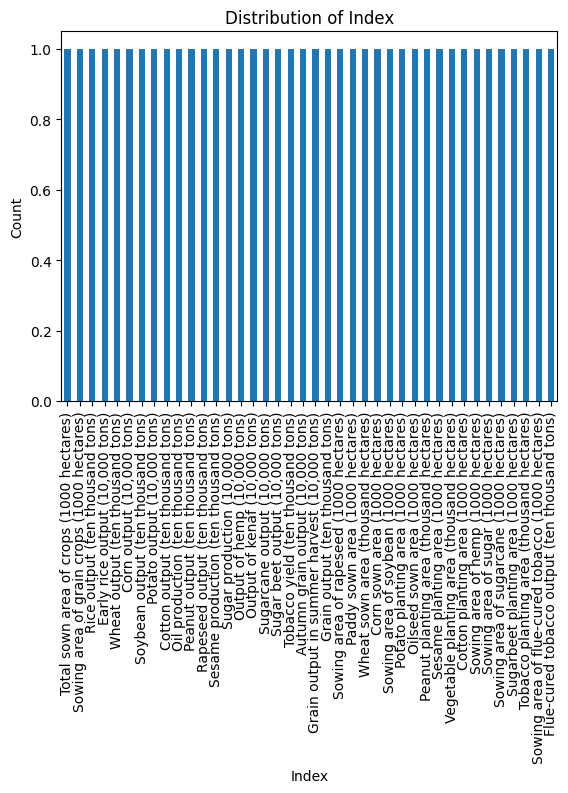

In [65]:
# Bar charts for counts of each category within categorical columns
for col in output_cleaned.select_dtypes(include='object'):
    output_cleaned[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()